# Notebook containing runs for left fixed right free scenario

## Constants definitions

In [1]:
L = 10; % length = 10 m
b = 0.1; % width = 10 cm
d = 0.05; % height = 5 cm
E = 2*10^11; % Young�s modulus for steel = 200 GPa = 2x10^11 Pa
I = b*d^3/12; % second moment of inertia
rho = 7850; % mass density of steel = 7850 kg/m^3
g = 9.81; % acceleration due to gravity = 9.81 m/s^2
w = rho*b*d*g; % weight of the beam per unit length (will be our f)

## Class Project Version

In [17]:
n = 1000; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for
A = sparse(N,N);
% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
f(1) =  0;
f(N) = f(N)/2;
% Creating diagonals of the matrix
for i=1:N
    for j = 1:N
        % adding the main diagonal
        if i == j && i > 1 && i <= N - 1
            A(i,j) = 6;
        endif
        % adding the first superdiagonal and subdiagonal
        if abs(i - j) == 1 && i > 1 && i <= N - 1
            A(i,j) = -4;
        endif
        % adding the second superdiagonal and subdiagonal
        if abs(i - j) == 2 && i > 1 && i <= N - 1
            A(i,j) = 1;
        endif
    endfor
endfor

% left end
A(1,1) = 1;
A(2,1) = 0;
A(3,1) = 0;
A(2,2) = 7;

% right end
A(N,N) = 1;
A(N-1,N-1) = 5;
A(N,N-1) = -2;
A(N,N-2) = 1;
A(N-1,N) = -2;

% Solve for y
y = A\f;
% Plots

x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))


ErrMax =   1.0105e-005


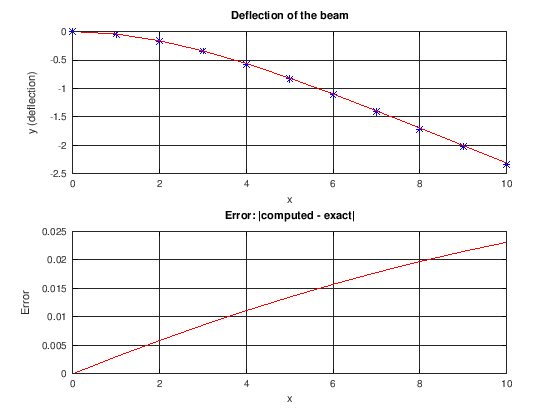

In [11]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

In [ ]:
n = 10; % number of subintervals on [h, L]
A = sparse(n,n);
h = L/(n+1); % discretization spacing
N = n+1; % number of unknowns to be solved for 

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
%f(1) = f(N) = 0;

% left end point
A(1,1) = 12;
A(1,2) = -6;
A(1,3) = (4/3);

% Creating diagonals of the matrix
for i=1:N
    for j = 1:N
        % adding the main diagonal
        if i == j && i > 1 && i <= N - 1
            A(i,j) = 6;
        endif
        % adding the first superdiagonal and subdiagonal
        if abs(i - j) == 1 && i > 1 && i <= N - 1
            A(i,j) = -4;
        endif
        % adding the second superdiagonal and subdiagonal
        if abs(i - j) == 2 && i > 1 && i <= N - 1
            A(i,j) = 1;
        endif
    endfor
endfor

% right endpoint
A(N,N) = (12/25);
A(N-1,N) = (-43/25);
A(N,N-1) = (-24/25);
A(N-1,N-1) = (111/25);
A(N,N-2) = (12/25);
A(N-1,N-2) = (-93/25);

% Finding y
y = A\f;

% Plots
x = (h:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact)

** Warning: Cannot interrupt Octave on Windows
parse error:

  syntax error

>>> disp("59bdb895388b4f63b707996b35fd8658");
       ^




In [ ]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

In [ ]:
n = 100; % number of subintervals on [h, L]
h = L/n; % discretization spacing
N = n; % number of unknowns to be solved for
A = sparse(N,N);
% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
%f(1) = f(N) = 0;

% left end point
A(1,1) = 12;
A(1,2) = -9;
A(1,3) = (8/3);
A(1,4) = (-1/4);

% right endpoint
A(N,N) = (72/17);
A(N-1,N) = (-28/17);
A(N,N-1) = (-156/17);
A(N-1,N-1) = (72/17);
A(N-1,N-2) = (-60/17);
A(N,N-2) = (96/17);
A(N,N-3) = (-12/17);
A(N-1,N-3) = (16/17);


% Creating diagonals of the matrix
for i=1:N
    for j = 1:N
        % adding the main diagonal
        if i == j && i > 1 && i <= N - 2
            A(i,j) = 6;
        endif
        % adding the first superdiagonal and subdiagonal
        if abs(i - j) == 1 && i > 1 && i <= N - 2
            A(i,j) = -4;
        endif
        % adding the second superdiagonal and subdiagonal
        if abs(i - j) == 2 && i > 1 && i <= N - 2
            A(i,j) = 1;
        endif
    endfor
endfor

% Finding y
y = A\f;

% Plots
x = (h:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))

In [ ]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;